<b>Dans ce notebook on réalise l'analyse exploratoire du dataset.</b>

# Table of contents
1. [Load clean dataset](#load)
2. [Analyses univariées](#def_features)
3. [Analyses univariées](#univariate)
4. [Analyses bivariées](#bivariate)
5. [Analyses multivariées](#multivariate)

    5.1 [Analyse descriptive](#desc)
    
    5.2 [Analyse explicative](#expl)
6. [Simulation d'application](#application) 


<b style="background-color:tomato;font-size:14px;">1. LOAD CLEAN DATASET<b>
    <a id="load"></a> 

In [1]:
import numpy as np 
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

try:
    del data
except:
    dummy=1

#On ne prend qu'un échantillon du fait des limitations mémoire de la machine
data=pd.read_csv('../dataset/en.openfoodfacts.org.products.csv',sep='\t',nrows=300000, low_memory=False)

<b style="background-color:tomato;font-size:14px;">2. DEFINITION DES FEATURES DE SCORING<b>
    <a id="def_features"></a> 

Compte tenu des éléments de définition et de description fournis pour établir le score nutritionnel on propose de définir les features de scoring :

In [33]:
scoring_features = ['energy-kcal_100g',
 'saturated-fat_100g',
'salt_100g',
'sugars_100g',
'fiber_100g',
'proteins_100g',
'fruits-vegetables-nuts_100g']
scoring_features

['energy-kcal_100g',
 'saturated-fat_100g',
 'salt_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'fruits-vegetables-nuts_100g']

<b style="background-color:tomato;font-size:14px;">3. ANALYSES UNIVARIEES<b>
    <a id="univariate"></a> 

<b style="background-color:tomato;font-size:12px;">3.1 Valeurs synthétiques<b>
    <a id="univariate_mean"></a> 

In [82]:
from tabulate import tabulate

details=[]
details.append(['Feature','mean','std','Item remarquable','Max'])
for i in scoring_features:
    mean = round(data[i].mean(),3)
    std = round(data[i].std(),3)
    max = round(data[i].max(),0)
    worse = data.loc[data[i] == max]
    details.append([i,mean,std,worse['product_name'].iloc[0],max])

print(tabulate(details)) 

---------------------------  -------  -------  -------------------------------------  -------
Feature                      mean     std      Item remarquable                       Max
energy-kcal_100g             264.566  230.606  Costco                                 49800.0
saturated-fat_100g           4.883    8.437    Cheese Sticks-Sharp Chedder            2000.0
salt_100g                    2.264    29.069   Smoked Uncured Ham                     2490.0
sugars_100g                  14.618   20.59    Premium Slaw Salad Kit - Honey Pecan   550.0
fiber_100g                   2.605    4.873    Vegan lean shake                       900.0
proteins_100g                7.821    11.368   Vegan lean shake                       2500.0
fruits-vegetables-nuts_100g  36.194   36.683   Pistaches grillées sans sel Wonderful  100.0
---------------------------  -------  -------  -------------------------------------  -------


<b style="background-color:tomato;font-size:12px;">3.2 Représentation des quantiles<b>
    <a id="univariate_quantiles"></a> 

<Figure size 1440x360 with 0 Axes>

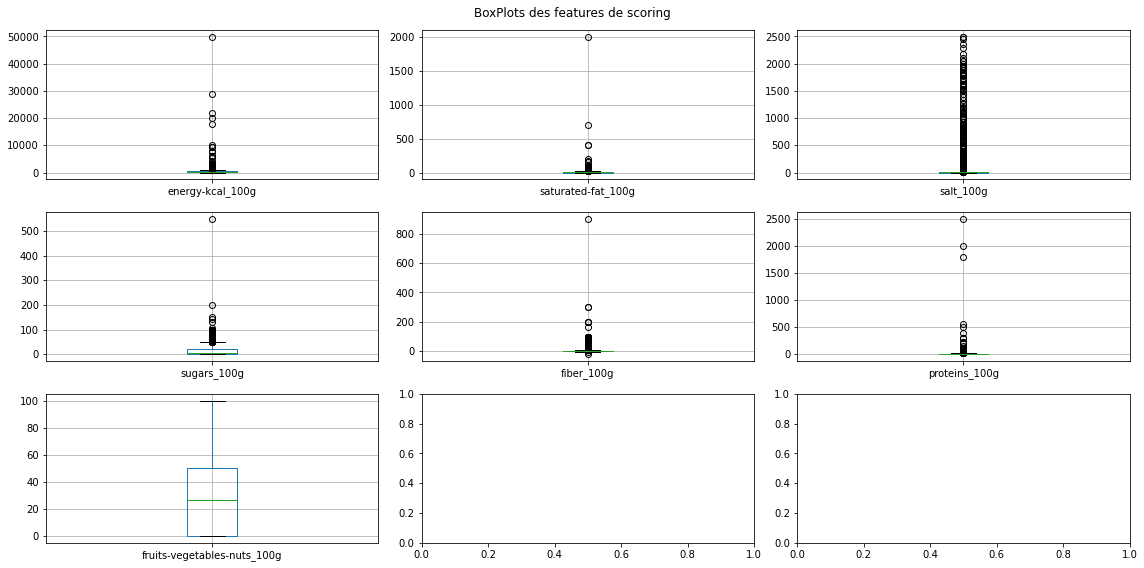

In [88]:
plt.figure(figsize=(20,5))

fig, axes = plt.subplots(3,3, figsize=(16,8))

plt.suptitle("BoxPlots des features de scoring")
for i, ax in zip(range(7), axes.flat):
    data.boxplot(column=[scoring_features[i]], ax=axes.flatten()[i])
    
plt.tight_layout()    

plt.show() 



<b style="background-color:tomato;font-size:12px;">3.3 Analyse<b>
    <a id="univariate_analysis"></a> 

############### Analyse

<b style="background-color:tomato;font-size:14px;">4. ANALYSES BIVARIEES<b>
    <a id="bivariate"></a> 

<b style="background-color:tomato;font-size:12px;">4.1 Matrice de correlation<b>
    <a id="correlation_matrix"></a> 

On cherche à détecter les relations linéaires qui peuvent exister entre les variables du dataset. On retient donc pour cela la représentation de la matrice de correlation du coefficient de relation linéaire de Pearson.

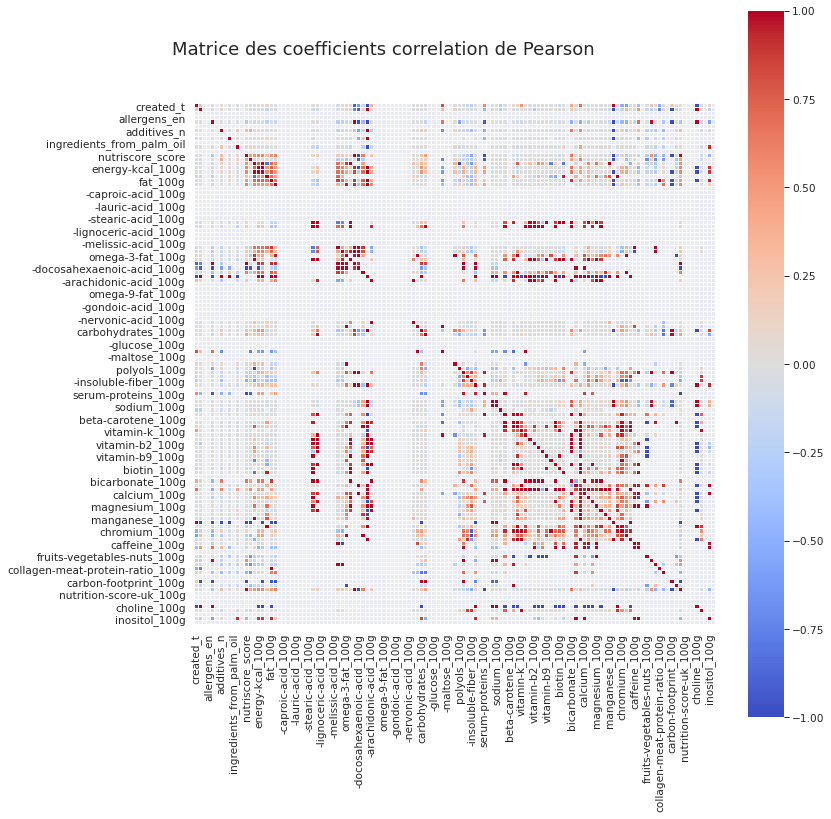

In [8]:
sns.set(context="paper", font_scale = 1.2)
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 12))
f.text(0.45, 0.93, "Matrice des coefficients correlation de Pearson", ha='center', fontsize = 18)
sns.heatmap(corrmat, square=True, linewidths=0.01, cmap="coolwarm")
plt.tight_layout()

<b style="background-color:tomato;font-size:12px;">4.2 Zooms <b>
    <a id="zoom"></a> 

In [6]:
def plotCorrelationMatrix(feature,title):
    sns.set(context="paper", font_scale = 1.2)
    f, ax = plt.subplots(figsize=(11, 11))
    cols = corrmat.nlargest(25, feature)[feature].index
    cm = corrmat.loc[cols, cols] 
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                     fmt='.2f', annot_kws={'size': 9}, linewidth = 0.1, cmap = 'coolwarm',
                     yticklabels=cols.values, xticklabels=cols.values)
    f.text(0.5, 0.93, title, ha='center', fontsize = 18)
    plt.show()

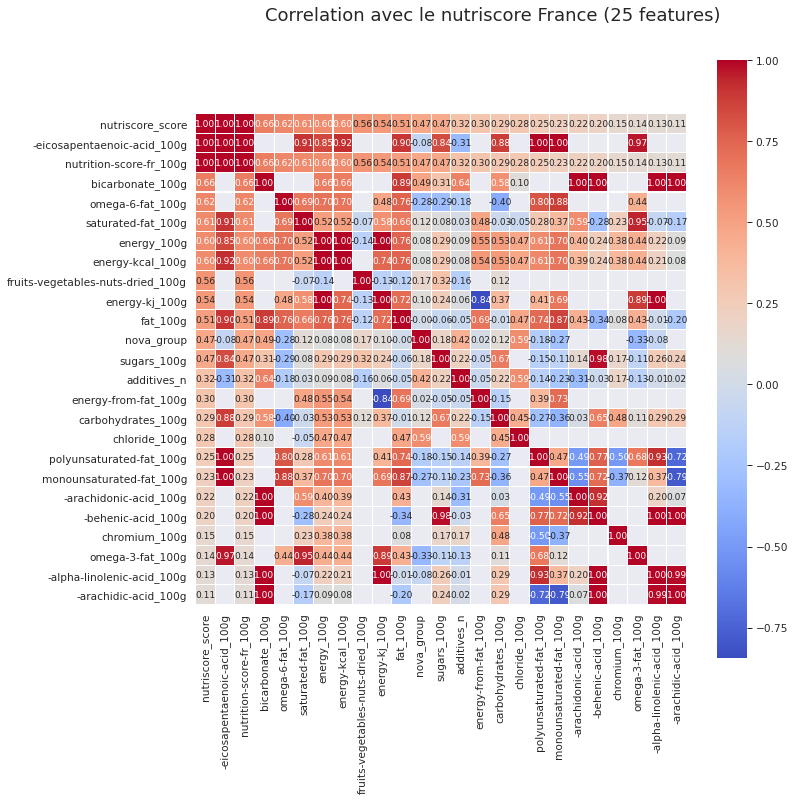

In [10]:
plotCorrelationMatrix('nutrition-score-fr_100g','Correlation avec le score nutritionnel France (25 features)')

<Figure size 1440x360 with 0 Axes>

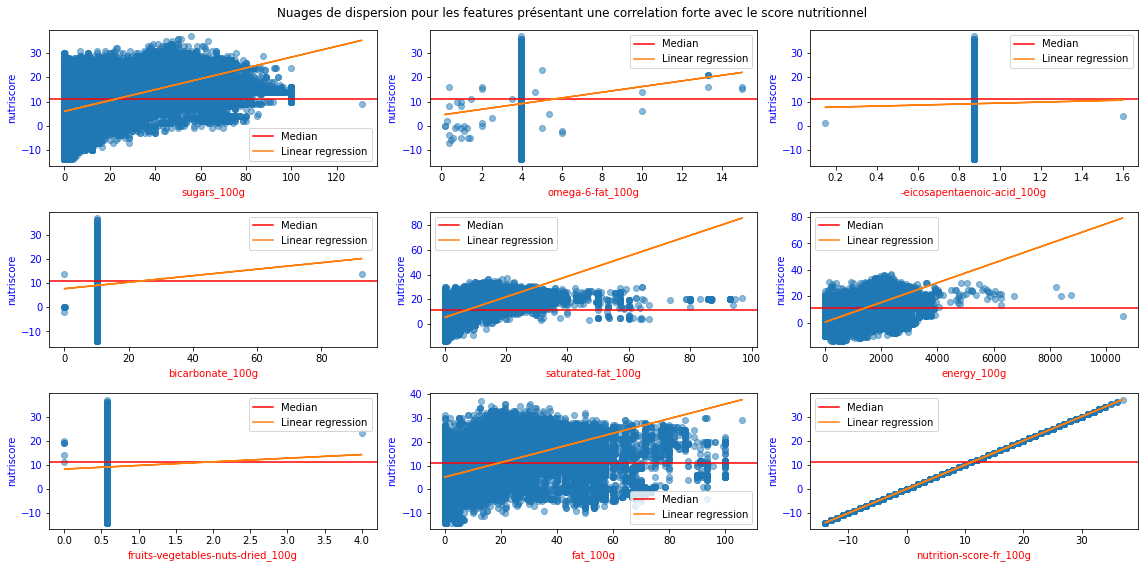

In [150]:

pd.options.mode.chained_assignment = None
features = ["sugars_100g","omega-6-fat_100g","-eicosapentaenoic-acid_100g","bicarbonate_100g","saturated-fat_100g",
               "energy_100g","fruits-vegetables-nuts-dried_100g","fat_100g","nutrition-score-fr_100g"]

nutriscores = data[data.nutriscore_score.notnull()]
median = nutriscores["nutriscore_score"].median()

plt.figure(figsize=(20,5))

fig, axes = plt.subplots(3,3, figsize=(16,8))

plt.suptitle("Nuages de dispersion pour les features présentant une correlation forte avec le score nutritionnel")
for i, ax in zip(range(9), axes.flat):
    ax.set_xlabel(features[i], color="red")
    ax.set_ylabel('nutriscore', color='blue')

    feature_mean = nutriscores[features[i]].mean()
    subset=nutriscores[features[i]]
    subset.fillna(feature_mean, inplace = True)    
    
    ax.plot(nutriscores[features[i]],nutriscores["nutriscore_score"], 'o',alpha=0.5)
    ax.tick_params(axis='y', labelcolor="blue")
    
    ax.axhline(y=median, color='r', linestyle='-', label='Median')

    x = nutriscores[features[i]].to_numpy(dtype=object).astype(str).astype(float)
    y = nutriscores['nutriscore_score'].to_numpy(dtype=object).astype(str).astype(float)

    m, b = np.polyfit(x, y, 1)
    ax.plot(subset, m*subset + b, label='Linear regression')
    ax.legend()

plt.tight_layout()    

plt.show() 


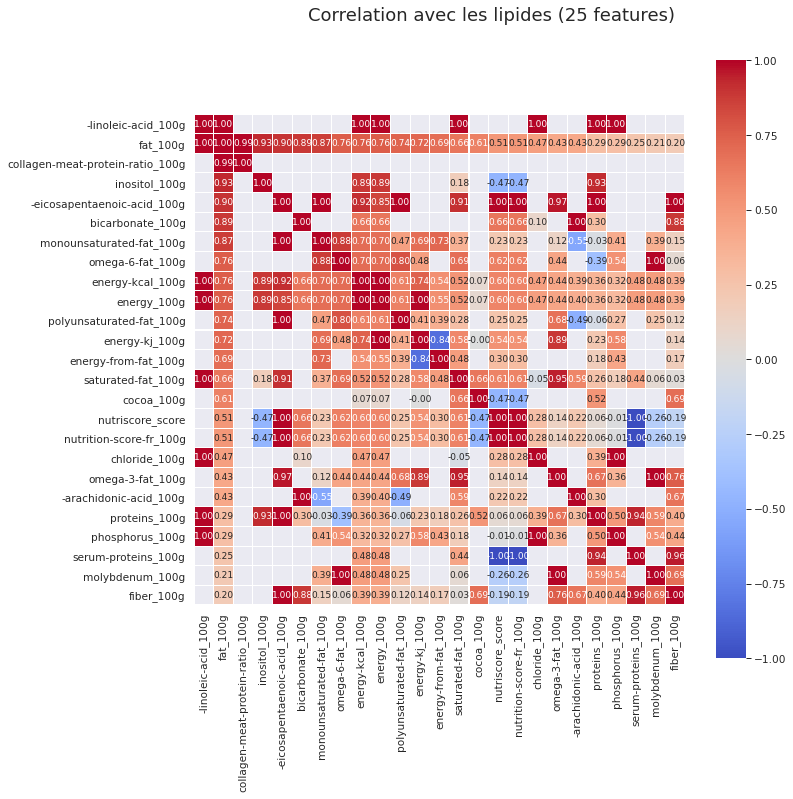

In [43]:
plotCorrelationMatrix('fat_100g','Correlation avec les lipides (25 features)')

<b style="background-color:tomato;font-size:12px;">4.3 Analyse du score nutritionnel par catégories de produit <b>
    <a id="eval_nutri_categ"></a> 

In [11]:
data['pnns_groups_1'].unique()

array(['unknown', 'Fat and sauces', 'Composite foods', 'Sugary snacks',
       'Fruits and vegetables', 'Fish Meat Eggs', 'Beverages',
       'Milk and dairy products', 'Cereals and potatoes', 'Salty snacks',
       'sugary-snacks', nan, 'fruits-and-vegetables',
       'cereals-and-potatoes'], dtype=object)

In [12]:
categ_prod = [] ; label_prod = []
for i,s in enumerate(data['pnns_groups_1'].unique()):
    if isinstance(s, float): continue
    if s == 'unknown': continue    
    produit = str(s)
    df1 = data[data['pnns_groups_1'] == produit]
    table_1 = pd.Series(df1[pd.notnull(df1['nutrition-score-fr_100g'])]['nutrition-score-fr_100g'])
    categ_prod.append(table_1)
    label_prod.append(s)

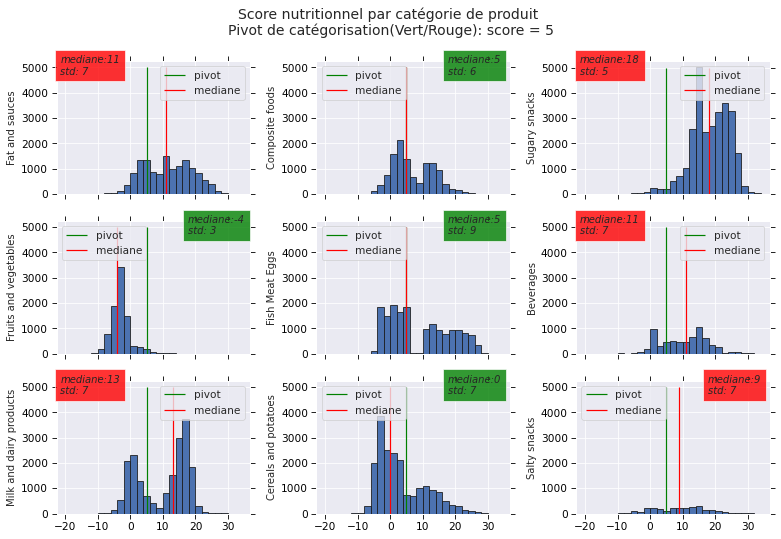

In [55]:
tPlot, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=False, figsize=(11,7))
axes = np.array(axes)

i=0
for ax in axes.reshape(-1):
    t = categ_prod[i].value_counts(sort=True)
    t.sort_index(inplace=True)
    hist = list(t)
    bins = list(t.index)
    
    ax.tick_params(labelcolor='black', top='off', bottom='on', left='on', right='off')
    ax.set_ylabel(label_prod[i], fontsize = 10)
    ax.hist(categ_prod[i], bins=range(-20,36,2), edgecolor = 'k')
    ax.vlines(x=5,ymin=0,ymax=5000,color='green',label='pivot')

    mediane = int(categ_prod[i].median())
    std = int(categ_prod[i].std())
    #skewness = round(categ_prod[i].skew(),3)
    #kurtosis = round(categ_prod[i].kurtosis(),3)

    ax.vlines(x=mediane,ymin=0,ymax=5000,color='red',label="mediane")
    
    
    color = 'green' if mediane <= 5 else 'red'

    if mediane < 11:
        #ax.text(0.68, 0.9, 'mediane:' + str(mediane) + '\nskewness: ' + str(skewness) + '\nkurtosis: ' + str(kurtosis), style='italic',
        ax.text(0.68, 0.9, 'mediane:' + str(mediane) + '\nstd: ' + str(std), style='italic',
        #ax.text(0.68, 0.9, 'mediane:{}'.format(int(categ_prod[i].median())), style='italic',
        transform=ax.transAxes, fontsize = 10,
                bbox={'facecolor':color, 'alpha':0.8, 'pad':5})
        ax.legend(loc="upper left")
    else:
        #ax.text(0.02, 0.9, 'mediane:' + str(mediane) + '\nskewness: ' + str(skewness) + '\nkurtosis: ' + str(kurtosis), style='italic',
        ax.text(0.02, 0.9, 'mediane:' + str(mediane) + '\nstd: ' + str(std), style='italic',
        #ax.text(0.02, 0.9, 'mediane:{}'.format(int(categ_prod[i].median())), style='italic',
        transform=ax.transAxes, fontsize = 10,
                bbox={'facecolor':'red', 'alpha':0.8, 'pad':5})
        ax.legend(loc="upper right")
           
    i += 1

tPlot.text(0.5, 1.01, 'Score nutritionnel par catégorie de produit \nPivot de catégorisation(Vert/Rouge): score = 5', ha='center', fontsize = 14)
plt.tight_layout()

<p>La représentation de formes du score nutritionnel des catégories générales montre déjà des variations de formes intéressantes à analyser.</p>
<p>Le tableau ci-dessous détaille l'analyse pour chaque catégorie.</p>
<p>A noter qu'ici on ne prend pas en considération les indicateurs de skewness et kurtosis du fait d'une part que les données ne constituent pas une distribution normale, d'autre part parce que la limite de forme est fixe (score = 5). On peut toutefois commenter la forme par rapport à cette limite.</p>
<table>
    <tr>
        <td bgcolor="blue">Catégorie</td>
        <td bgcolor="blue">Médiane</td>   
        <td bgcolor="blue">Description de la distribution (médiane/std)</td>            
        <td bgcolor="blue">Description de forme par rapport à la valeur pivot</td>   
        <td bgcolor="blue">Queue gauche</td>   
        <td bgcolor="blue">Queue droite</td>           
        <td bgcolor="blue">Commentaires de forme</td>   
        <td bgcolor="blue">Conclusions</td>
    </tr>
    <tr>
        <td>Fats and sauces</td>
        <td>11</td>
        <td>Forme continue et homogène de part et d'autre : cette catégorie couvre une plage de valeurs de score nutritionnel importante essentiellement dans des valeurs élevées (ie mauvais score)</td>
        <td>Forme asymétrique décentrée sur la droite</td>
        <td>Décroissement fort</td>
        <td>Etalement continu</td>
        <td>Les produits de cette catégorie présentent majoritairement un mauvais score nutritionnel, avec pour certains des valeurs très mauvaises. Il peut arriver que d'autres n'aient pas un mauvais score, cela traduit certainement des variations de qualité dans l'appellation "Matières grasses"</td>
        <td>Dans l'optique d'obtenir un repas ayant un bon score nutritionnel il est préférable de limiter voire d'éviter les produits de cette catégorie</td>
    </tr>
    <tr>
        <td>Composite foods</td>
        <td>5</td>
        <td>La médiane est confondue avec le pivot. La distribution présente un groupe recentré à gauche ce qui indique que certains produits de la catégorie ont de bons scores. Par contre à droite la distribution est plus étalée ce qui est corroboré par la valeur d'écart type qui est importante. Les produits de cette partie de la distribution peuvent même avoir de très mauvais score.</td>
        <td>Forme pseudo symétrique</td>
        <td>Décroissement fort</td>
        <td>Etalement quasi continu</td>
        <td>Cette catégorie présente de façon égale une part de produits ayant un bon score nutritionnel, tout comme un mauvais.</td>
        <td>En théorie il ne serait pas nécessairement déconseillé d'intégrer les produits de cette catégorie dans un repas, mais il faut être vigilant sur leur composition pour s'assurer de leur impact sur la qualité nutritionnelle du repas</td>
    </tr>
    <tr>
        <td>Sugary snacks</td>
        <td>18</td>
        <td>La forme de la distribution par rapport à la médiane est un peu complexe. La partie à gauche présente une valeur exceptionnelle. Hormis celle-ci la partie gauche est de forme décroissante ce qui indique qu'on retrouvera peu de produits avec un bon score nutritionnel. La partie droite est concentrée et homogène, ce qui montre que la majeure partie des produits de la catégorie présente un mauvais score nutritionnel. </td>
        <td>Forme asymétrique excentrée à droite</td>
        <td>Queue gauche quasi inexistante</td>        
        <td>Queue droite très concentrée puis étalée jusqu'aux valeurs élevées de score nutritionnel</td>
        <td>Très clairement les produits de cette catégorie ont un très mauvais score nutritionnel. A noter toutefois la présence marginal de certains produits pouvant avoir un bon score</td>
        <td>On peut aisément conclure que les produits de cette catégorie sont absolument à éviter dans le cadre d'un repas où l'on vise d'avoir un bon score nutritionnel </td>
    </tr>
    <tr>
        <td>Fruits and vegetables</td>
        <td>-4</td>
        <td>La distribution est très recentrée sur la valeur médiane, avec toutefois une queue droite qui s'étale légèrement, tout en restant sous la valeur pivot. Clairement les produits de cette catégorie présentent un excellent score nutritionnel. </td>
        <td>Excentrée à gauche</td>
        <td>Très recentrée sur la valeur médiane</td>        
        <td>Quasi inexistante</td>
        <td>On peut considérer que tous les produits de la catégorie ont un bon score nutritionnel</td>
        <td>Les produits de cette catégorie peuvent être intégrés dans un repas sans craindre de faire chuter le score nutritionnel global. </td>
    </tr>
    <tr>
        <td>Fish Meat Eggs</td>
        <td>5</td>
        <td>La médiane est confondu avec la valeur pivot. Cependant l'écart type nous alerte déjà sur le fait que la distribution n'est pas homogène. On le constate avec sa forme qui est scindée bien distinctement. La partie gauche est bien regroupée sur une plage courte de valeurs de score nutritionnels ce qui signifie que les produits dans cette partie de la distribution sont nutritionnellement bons. A contrario la partie droite présente une rupture avec une forme étalée et homogène, qui montre un saut dans les valeurs de score nutritionnel élevées. Cela indique probablement une disparité de nature de produit</td>
        <td>Forme complexe présentant une rupture</td>
        <td>Homogène</td>        
        <td>Rupture puis étalement homogène</td>
        <td>La catégorie n'est pas homogène. Dans la même catégorie on retrouve des produits dont le score nutritionnel est soit très bon soit mauvais. </td>
        <td>Cette catégorie montre qu'il faudrait affiner la granularité d'analyse. En l'état il est difficile d'apporter une conclusion. C'est un pallier dans notre analyse, nous affinerons au point suivant</td>
    </tr>
    <tr>
        <td>Beverages</td>
        <td>11</td>
        <td>Forme plutôt uniformément étalée symétriquement par rapport à la médiane. Les deux queues couvrent des plages de valeurs assez larges. L'écart type étant assez élevé, on peut penser que cette catégorie englobe un ensemble assez disparate de produits </td>
        <td>Forme aplatie évasée couvrant une large plage de valeurs de score nutritionnel</td>
        <td>Courte avec une valeur exceptionnelle</td>
        <td>Homogène très étalée</td>  
        <td>La catégorie couvre des produits qui présentent des valeurs très disparates. Certains ont de bons score, mais on retrouve à l'opposé d'autres qui ont de mauvaises performances</td>
        <td>Là encore nous pouvons conclure que la granularité d'analyse n'est pas suffisante pour établir un conseil autour des produits de cette catégorie.</td>
    </tr>
    <tr>
        <td>Milk and dairy products</td>
        <td>13</td>
        <td>La forme générale de la distribution montre qu'il y a deux ensembles de produits avec une rupture dans les valeurs de score nutritionnel. Le groupement à gauche présente une densification à partir d'une valeur beaucoup plus basse que la médiane, tandis que le groupement à droite est continu et homogène dans les valeurs élevées. Ce constat est corroboré par la valeur d'écart type qui est élevée</td>
        <td>Forme complexe avec deux groupements distincts</td>
        <td>N/A</td>        
        <td>N/A</td>
        <td>Les produits de la catégorie ne présentent pas tous les mêmes caractéristiques nutritionnelles. Il s'agit d'un ensemble non homogène pour lequel il est difficile de tirer des généralités sur ses qualités nutritionnelles.</td>
        <td>A nouveau nous devons affiner la granularité d'analyse.</td>
    </tr>
    <tr>
        <td>Cereals and potatoes</td>
        <td>0</td>
        <td>La forme est asymétrique avec une queue droite progressivement dégressive vers des valeurs élevées. </td>
        <td>La forme est asymétrique avec une répartition élevé de la distribution à gauche de la valeur pivot.</td>
        <td>Homogène avec une valeur élevée</td>        
        <td>Etalée progressivement dégressive</td>
        <td>La médiane étant très inférieure à la valeur pivot on peut comprendre que l'essentiel de ces produits présente de bons à très bons scores. Mais parmi les produits de la catégorie on en retrouve qui présentent de mauvais score, ce qui tend à montrer qu'il est impossible de généraliser a priori sur ces produits en partant uniquement de leur catégorie.</td>
        <td>De nouveau la granularité d'analyse n'est pas suffisante pour établir des recommandations sur cette catégorie.</td>
    </tr>
    <tr>
        <td>Salty snacks</td>
        <td>9</td>
        <td>Forme étalée aplatie, équi-répartie de part et d'autre de la valeur médiane. L'écart type étant proportionnellement élevé on a une distribution peu homogène en termes de score nutritionnel </td>
        <td>Forme légèrement asymétrique</td>
        <td>Aplatie légèrement dégressive</td>        
        <td>Aplatie légèrement dégressive</td>
        <td>Cette catégorie regroupe peu de produits par rapport aux autres. Sa distribution en termes de score nutritionnel étant disparate, il semble difficile d'apporter des recommandations générales à leur sujet.</td>
        <td>Il est probable que d'affiner la granularité de l'analyse permettra de mieux classifier ces produits pour établir de meilleurs recommandations nutritionnelles </td>
    </tr>
</table>
<br>
<p>Globalement il ressort de cette première analyse qu'il est nécessaire d'affiner la granularité si on veut pouvoir montrer la pertinence d'incorporer une alternative à un produit ou ingrédient donné dans un menu.</p>

<b style="background-color:tomato;font-size:12px;">4.3 Analyse des features de scoring par sous groupes <b>
    <a id="feature_scoring"></a> 

<b style="background-color:tomato;font-size:10px;">4.3.1 Energie <b>
    <a id="feature_scoring_energy"></a> 

<AxesSubplot:title={'center':'energy-kcal_100g'}, xlabel='pnns_groups_2'>

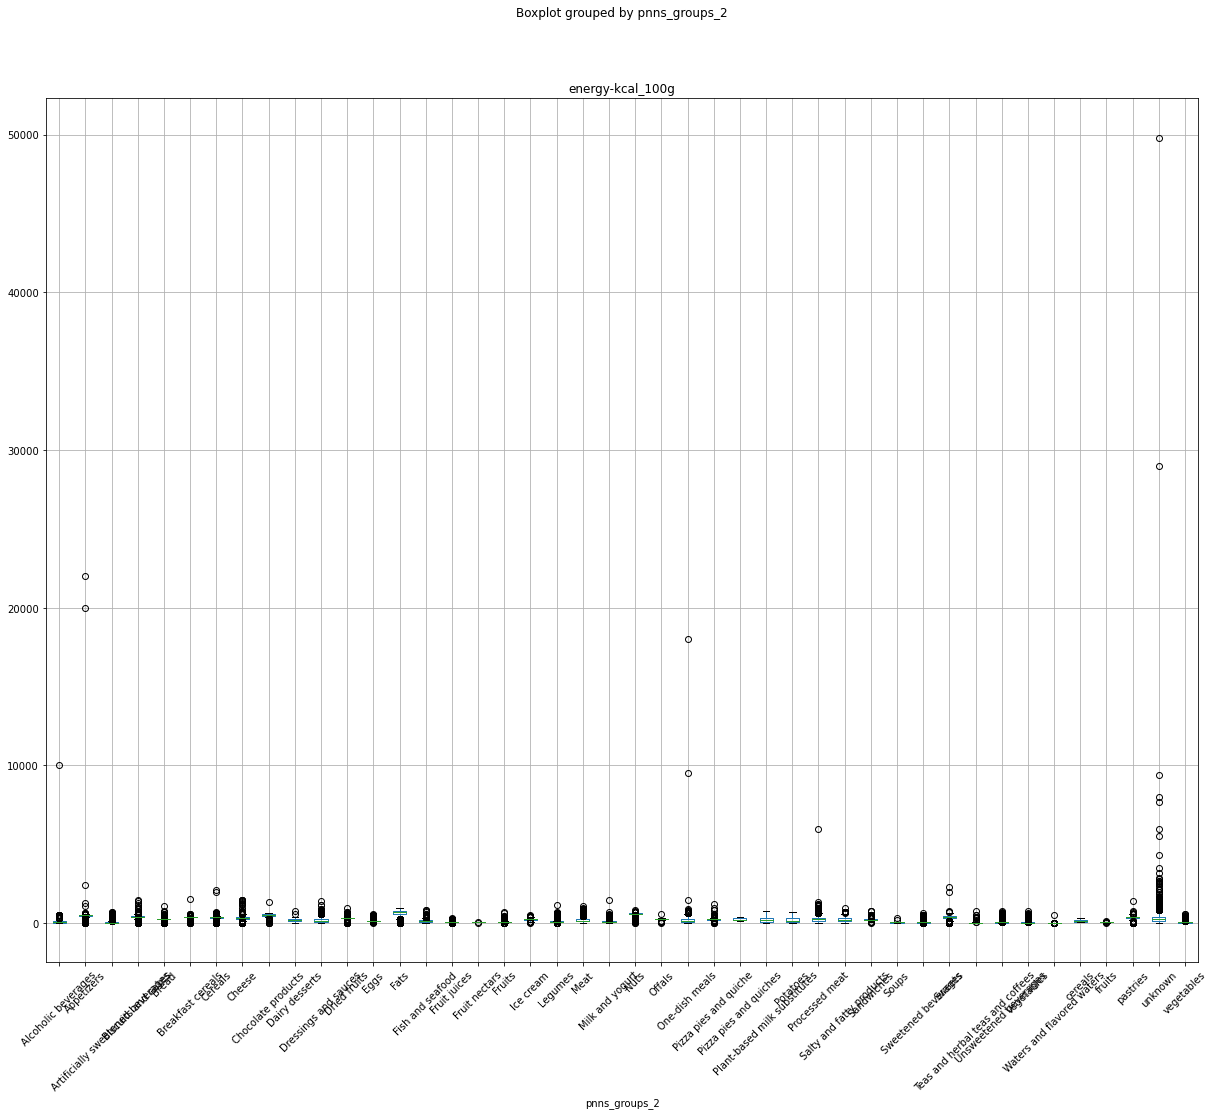

In [26]:
fig, ax = plt.subplots(figsize=(20,16))
plt.suptitle('')
data.boxplot(column=['energy-kcal_100g'], by='pnns_groups_2', ax=ax,rot=45)

<b style="background-color:tomato;font-size:10px;">4.3.2 Sucre <b>
    <a id="feature_scoring_sugar"></a> 

<b style="background-color:tomato;font-size:10px;">4.3.3 Acides gras saturés <b>
    <a id="feature_scoring_saturated_fat"></a> 

<b style="background-color:tomato;font-size:10px;">4.3.4 Sel <b>
    <a id="feature_scoring_salt"></a> 

<b style="background-color:tomato;font-size:10px;">4.3.5 Fruits, légumes, oléagineux <b>
    <a id="feature_scoring_fruits"></a> 

<b style="background-color:tomato;font-size:10px;">4.3.6 Fibres <b>
    <a id="feature_scoring_fibers"></a> 

<b style="background-color:tomato;font-size:10px;">4.3.7 Protéines <b>
    <a id="feature_scoring_proteins"></a> 

<b style="background-color:tomato;font-size:10px;">4.3.8 Synthèse <b>
    <a id="feature_scoring_proteins"></a> 

<b style="background-color:tomato;font-size:14px;">5. ANALYSES MULTIVARIEES<b>
    <a id="multivariate"></a> 

<b style="background-color:tomato;font-size:14px;">5.1 ANALYSE DESCRIPTIVE<b>
    <a id="desc"></a> 

Au point précédent on a pu mettre en évidence des valeurs de score nutritionnel élevées (mauvais score) et disparates en fonction des principales catégories de produit
Il apparait nécessaire toutefois d'affiner dans l'objectif de permettre à notre application d'offrir une granularité plus fine (ingrédient brut).
Pour cela on va dégager les catégories principales de notre dataset par analyse acp et montrer les mesures de variation qui leur sont liées.

In [ ]:
acp, éboulis de valeurs propres, limitation selon le facteur de kaiser

<b style="background-color:tomato;font-size:14px;">5.2 ANALYSE EXPLICATIVE<b>
    <a id="expl"></a> 

In [ ]:
anova

<b style="background-color:tomato;font-size:14px;">6. SIMULATION D'APPLICATION<b>
    <a id="application"></a> 